## 과제1(회귀를 이용한 예측: 차원축소)

통계학과 김상현(202211545)

### 0 . Load Data & Libraries

In [181]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression

In [182]:
# plotting setup for mac
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style="whitegrid")

In [183]:
# for windows
#plt.rcParams['font.family'] = 'Malgun Gothic'

In [184]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = (pd.read_excel(url))

In [185]:
print(df.head(3))

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33


In [186]:
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",
              "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

# target variable: Heating Load, Cooling Load

In [187]:
print(df)

     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing A

In [188]:
# Energy Efficiency Dataset (반응변수로 Y2인 Cooling Load를 사용할 것)
df = df.drop(columns=["Heating Load"])

print(df.head(3))

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Cooling Load  
0            2           0.0                          0         21.33  
1            3           0.0                          0         21.33  
2            4           0.0                          0         21.33  


### 1. EDA

In [189]:
print(df.shape)

(768, 9)


In [190]:
print(df.describe())

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

In [191]:
print(df.isna().sum())

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Cooling Load                 0
dtype: int64


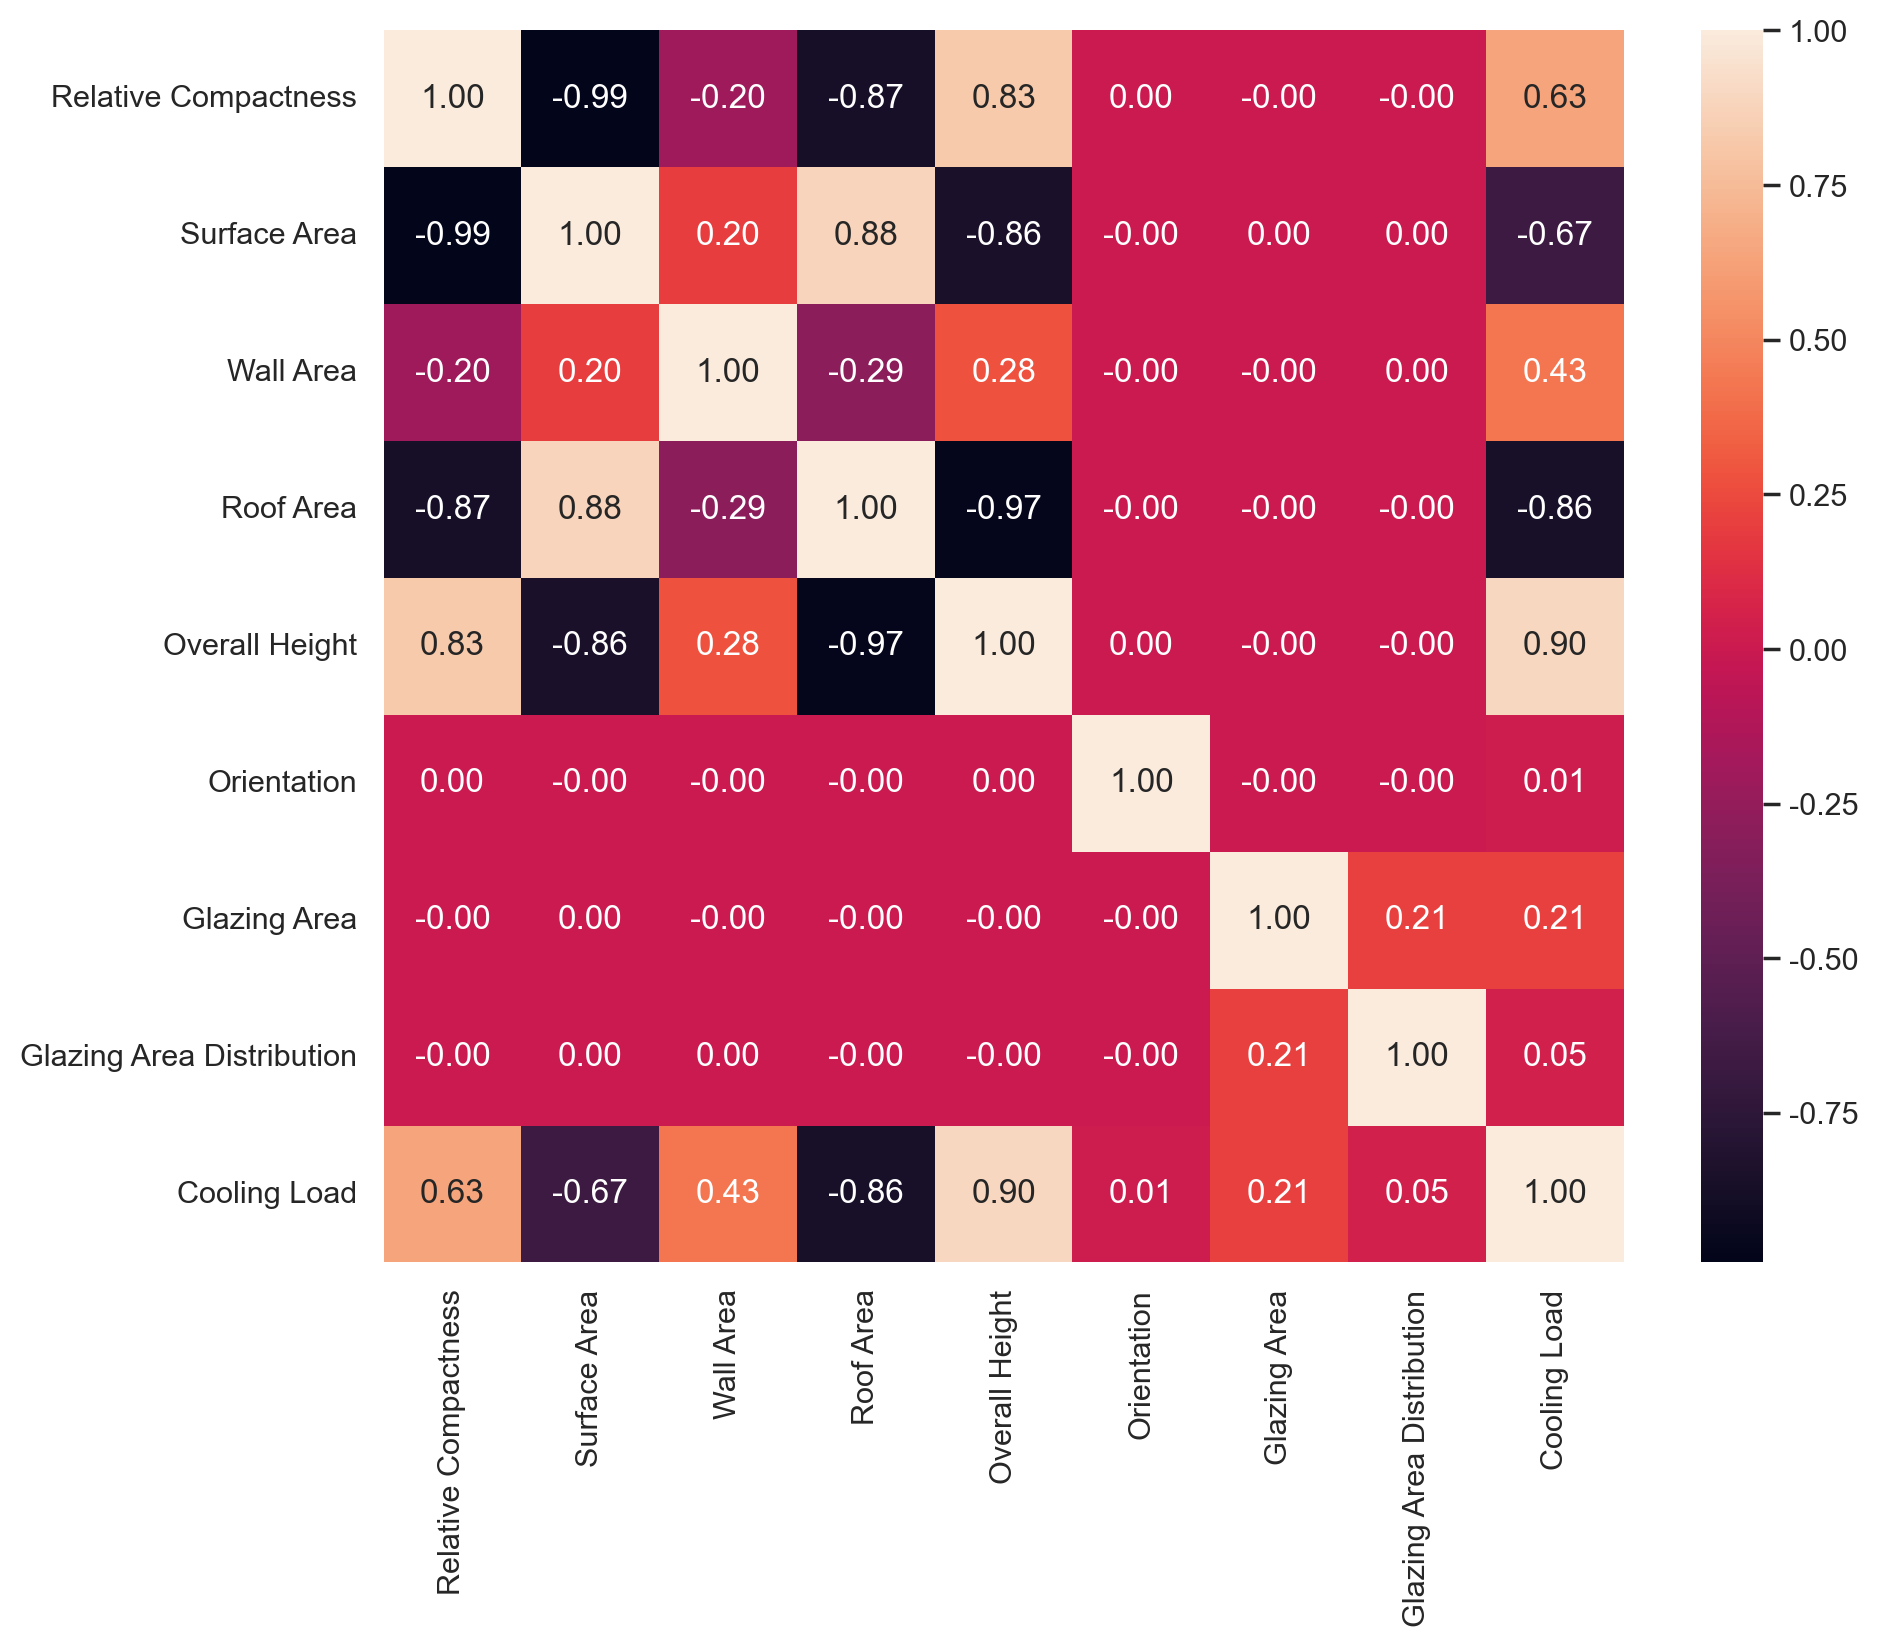

In [192]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

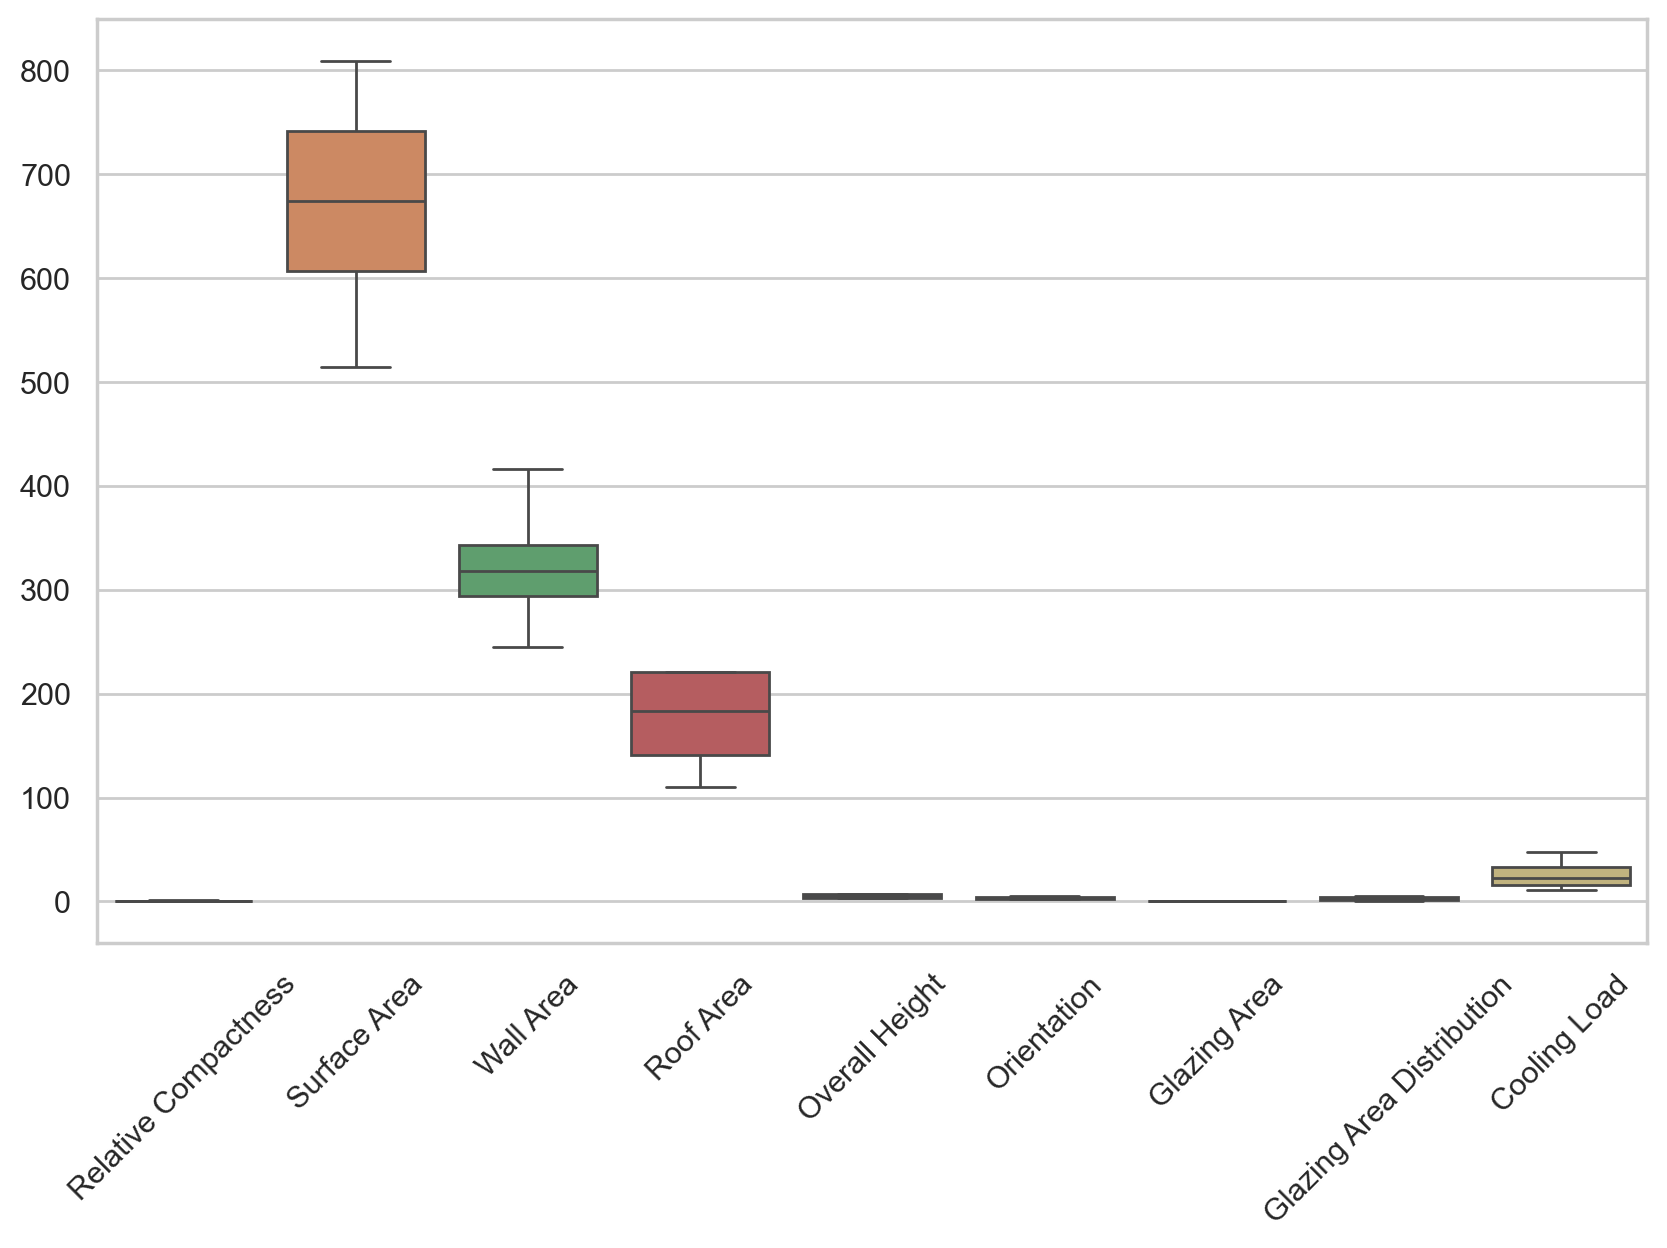

In [193]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### 2. 8개 설명변수들을 대상으로 PCA를 수행

In [194]:
# 독립 변수(X)와 종속 변수(Y) 분리
X = df.iloc[:, :-1]
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [195]:
y = df.iloc[:, -1]

print(y)
print(y.shape)

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling Load, Length: 768, dtype: float64
(768,)


In [196]:
y = y.values.reshape(-1, 1)

In [197]:
# 데이터 스케일링 (PCA는 변수 크기에 민감하므로 표준화 필요) -> 위에 boxplot에서 확인
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 반응변수 y에 대한 정규화는 PCA와 PCR 분석에서는 필요하지 않지만, PLS 분석을 위해 미리 해둔다.
y_scaled = scaler.fit_transform(y)

In [198]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

In [199]:
# 각 주성분의 설명하는 분산 비율 계산
explained_variance_full = pca_full.explained_variance_ratio_
cumulative_variance_full = np.cumsum(explained_variance_full)

In [200]:
for i, (ev, cum_ev) in enumerate(zip(explained_variance_full, cumulative_variance_full), start=1):
    print(f"PC{i}: {ev:.4f}, Cumulative: {cum_ev:.4f}")

PC1: 0.4629, Cumulative: 0.4629
PC2: 0.1550, Cumulative: 0.6178
PC3: 0.1516, Cumulative: 0.7695
PC4: 0.1250, Cumulative: 0.8945
PC5: 0.0984, Cumulative: 0.9928
PC6: 0.0066, Cumulative: 0.9994
PC7: 0.0006, Cumulative: 1.0000
PC8: 0.0000, Cumulative: 1.0000


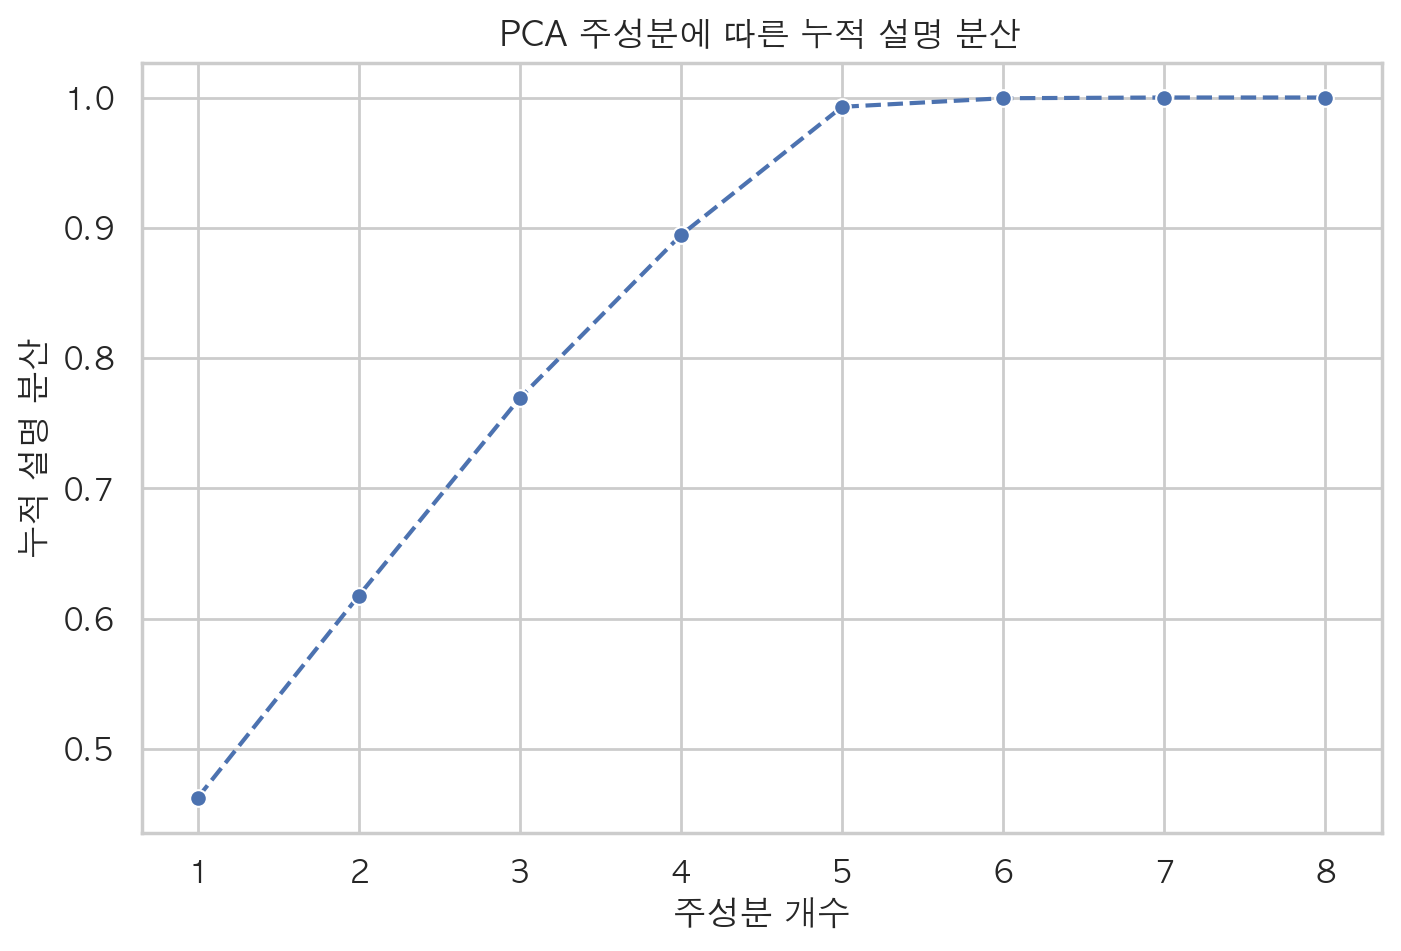

In [201]:
plt.rc('font', family='AppleGothic') # for mac
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(range(1, len(cumulative_variance_full)+1)),
             y=cumulative_variance_full,
             marker='o',
             linestyle='--',
             ax=ax)

ax.set_xlabel('주성분 개수')
ax.set_ylabel('누적 설명 분산')
ax.set_title('PCA 주성분에 따른 누적 설명 분산')
plt.show()

In [202]:
# 8개의 주성분 중, 설명력을 95% 이상 유지하는 차원 선택
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

In [203]:
# 주성분 개수 확인
print(X_pca.shape)

(768, 5)


### 3. PCR & PLS

* PCR
    * PCA를 통해 도출된 주성분들 중, 설명변수의 분산을 가장 많이 설명하는 순서대로 몇 개를 선택하여 회귀분석 진행.
    * 여기서 주의할 점은 PCA가 **설명변수들 간의** 분산만 고려한다..!
* PLS
    * PCA와 유사하지만, **설명변수(X)와 반응변수(Y) 간의** 공분산을 최대화하는 방향으로 주성분을 선택
    * 즉, 반응변수와 관련이 있는 새로운 변수를 식별한다.


#### PCR

 > Q : 몇 개의 주성분을 회귀분석에 사용할지 결정하라. <br>
 > A : PCA를 통해 도출된 주성분들 중, 설명변수의 분산을 가장 많이 설명하는 순서대로 5를 선택하여 회귀분석 진행

* PCR에선 반응변수는 그냥 기존 y를 사용한다.

In [204]:
# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [205]:
# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [206]:
# 예측 및 성능 평가
y_pred = model.predict(X_test)
mse_pcr = mean_squared_error(y_test, y_pred)
r2_pcr = r2_score(y_test, y_pred)

> Q: 예측성능 평가지표를 정하라 <p>
> A: MSE, R2 Score를 이용하자..!

In [207]:
print("\nPCR 모델 성능 :")
print(f"Mean Squared Error (MSE): {mse_pcr:.2f}")
print(f"R2 Score : {r2_pcr:.2f}")


PCR 모델 성능 :
Mean Squared Error (MSE): 15.47
R2 Score : 0.83


#### PLS

* PLS에선 반응변수를 정규화한 y_scaled를 사용한다.

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [209]:
X_train.shape

(614, 8)

In [210]:
# 최적의 PLS 주성분(n_components) 선택을 위한 교차 검증
# 가능한 주성분 개수는 1부터 설명변수 개수(여기서는 8)까지 고려합니다.
mse_cv = []
n_components_range = range(1, X_train.shape[1] + 1)

In [211]:
for n in n_components_range:
    pls_temp = PLSRegression(n_components=n)
    # 10-Fold Cross-Validation에서 음의 평균 제곱 오차를 구한다
    scores = cross_val_score(pls_temp, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
    mse_cv.append(-np.mean(scores))
    print(f"n_components = {n}, 교차 검증 MSE = {-np.mean(scores):.4f}")

n_components = 1, 교차 검증 MSE = 0.2430
n_components = 2, 교차 검증 MSE = 0.1534
n_components = 3, 교차 검증 MSE = 0.1449
n_components = 4, 교차 검증 MSE = 0.1232
n_components = 5, 교차 검증 MSE = 0.1173
n_components = 6, 교차 검증 MSE = 0.1172
n_components = 7, 교차 검증 MSE = 0.1156
n_components = 8, 교차 검증 MSE = 60.5221


In [212]:
# 최적의 주성분 개수 선택 (MSE가 최소일 때)
optimal_n = np.argmin(mse_cv) + 1
print("\n최적의 주성분 개수:", optimal_n)


최적의 주성분 개수: 7


> Q : 최적의 주성분 개수를 정하라 <p>
> A : 교차 검증을 통해 MSE가 최소인 주성분 개수를 선택하자..! -> 7개 일떄가 MSE가 가장 낮다. 7개를 선택하자.

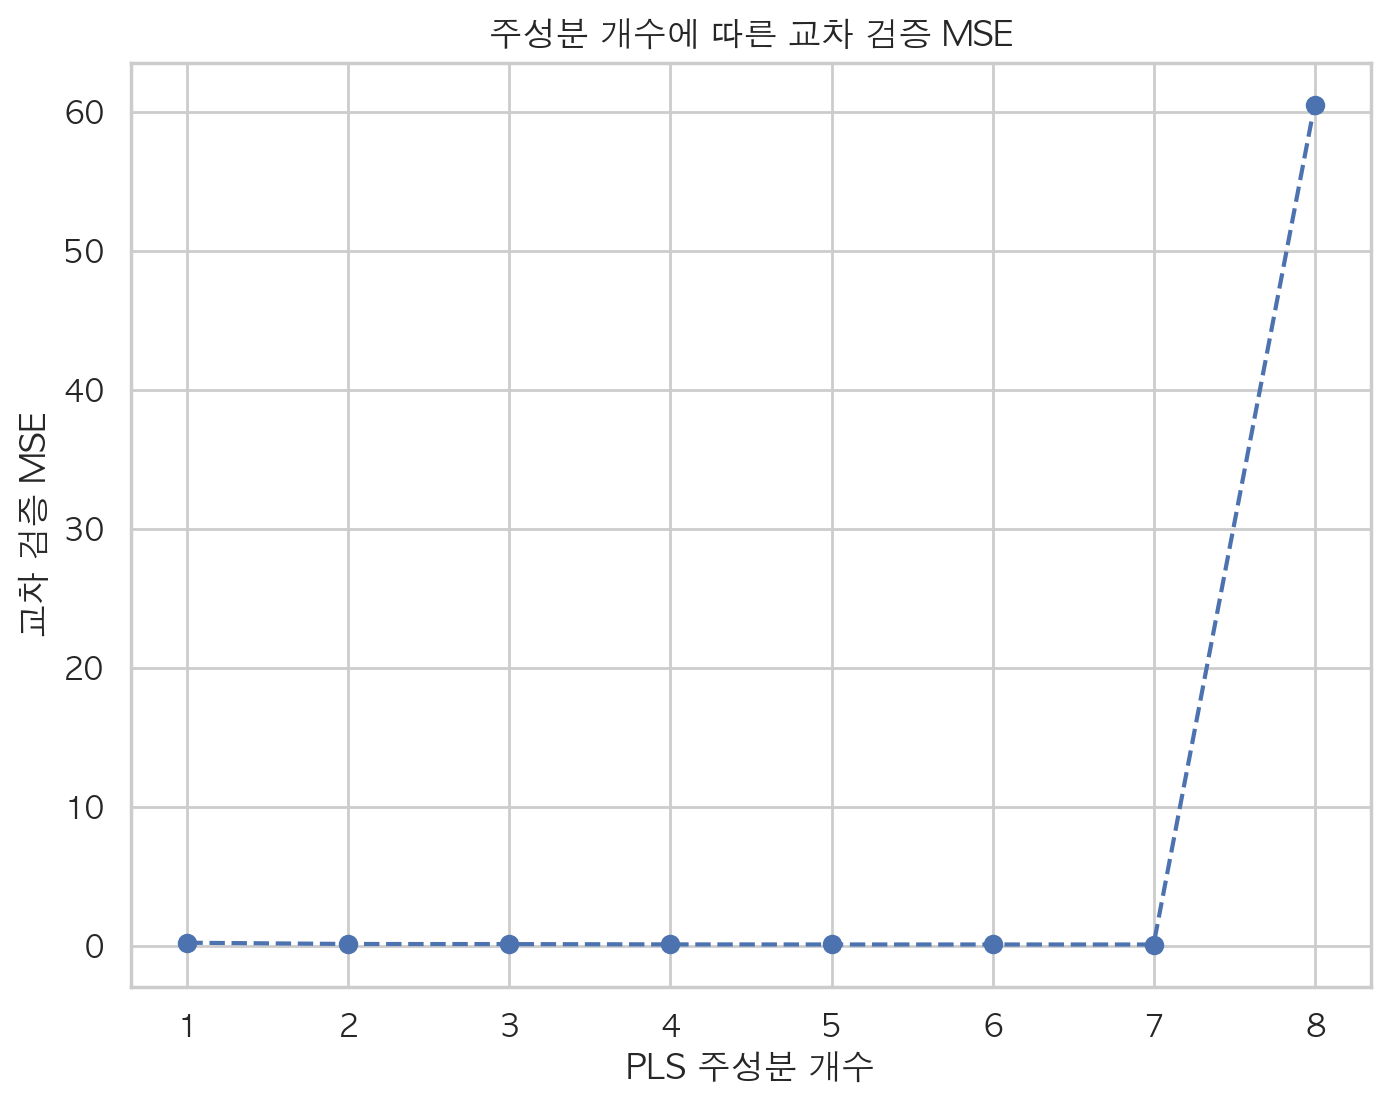

In [213]:
# 주성분 개수에 따른 교차 검증 MSE 시각화
plt.figure(figsize=(8,6))
plt.plot(n_components_range, mse_cv, marker='o', linestyle='--')
plt.xlabel('PLS 주성분 개수')
plt.ylabel('교차 검증 MSE')
plt.title('주성분 개수에 따른 교차 검증 MSE')
plt.grid(True)
plt.show()

In [214]:
pls_opt = PLSRegression(n_components=optimal_n)
pls_opt.fit(X_train, Y_train)

PLSRegression(n_components=np.int64(7))

In [215]:
Y_pred_opt = pls_opt.predict(X_test)
mse_test_pls = mean_squared_error(Y_test, Y_pred_opt)
r2_test_pls = r2_score(Y_test, Y_pred_opt)

In [216]:
print("\nPLS 회귀 모델 성능 (최적 주성분 사용):")
print(f"테스트 MSE: {mse_test_pls:.2f}")
print(f"테스트 R2 Score: {r2_test_pls:.2f}")


PLS 회귀 모델 성능 (최적 주성분 사용):
테스트 MSE: 0.11
테스트 R2 Score: 0.89


### 4. 두 회귀분석 방법에 대한 예측성능 평가지표가 어떻게 다른지 비교

In [217]:
df_comparison = pd.DataFrame({
    '모델': ['PLS', 'PCR'],
    'MSE': [mse_test_pls, mse_pcr],
    'R² Score': [r2_test_pls, r2_pcr]
})

# DataFrame 출력
print(df_comparison)

    모델        MSE  R² Score
0  PLS   0.109459  0.893226
1  PCR  15.465572  0.833088


* MSE
    * PLS는 설명변수와 반응변수의 공분산을 최대화하는 방향으로 주성분을 추출하여 반응변수와의 직접적인 관련성을 고려하기 때문에 일반적으로 테스트 데이터에 대한 예측 성능이 우수하여 낮은 MSE를 보인다..!
    * 하지만 PCR은 설명변수들 간의 분산만 고려하기 때문에 반응변수와의 관계를 충분히 반영하지 못할 수 있다. 이로 인해 PCR 모델은 PLS 모델에 비해 예측 성능이 떨어져 상대적으로 높은 MSE를 보인다.



* R^2 Score : 모델이 반응변수의 변동성을 얼마나 잘 설명하는지를 나타내는 지표
    * PLS는 반응변수와의 관계를 고려하여 주성분을 선택하기 때문에 R^2 Score가 높게 나타나며 모델이 반응변수를 잘 설명하고 있다는 것을 의미한다.
    * 반면 PCR은 설명변수들 간의 분산만 고려하기 때문에 R^2 Score가 낮게 나타나며 모델이 반응변수를 충분히 설명하지 못하고 있다는 것을 나타낸다.

<hr>

* 추가적으로 Dtype int인 feature : Orientation (방향), Glazing Area Distribution (유리창 분포)
> Orientation (방향) : 동/서/남/북 같은 건물 방향을 의미 <p>
> Glazing Area Distribution (유리창 분포) : 어떤 면(남, 북, 전체 등)에 유리가 있는지
* 이 Feature들은 범주형 자료라 해석 할 수 있으므로 더미 처리를 하여 모델을 다시 정의 할 수 있을 듯.
* 이로 인해 RMSE, R^2과 같은 평가지표에서 유의미한 성능 상향을 기대 할 수 있음.

In [218]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = (pd.read_excel(url))
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",
              "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [220]:
df['Orientation'].unique()

array([2, 3, 4, 5])

In [221]:
df['Glazing Area Distribution'].unique()

array([0, 1, 2, 3, 4, 5])

In [222]:
df_encoded = pd.get_dummies(df, columns=['Orientation', 'Glazing Area Distribution'], drop_first=True)

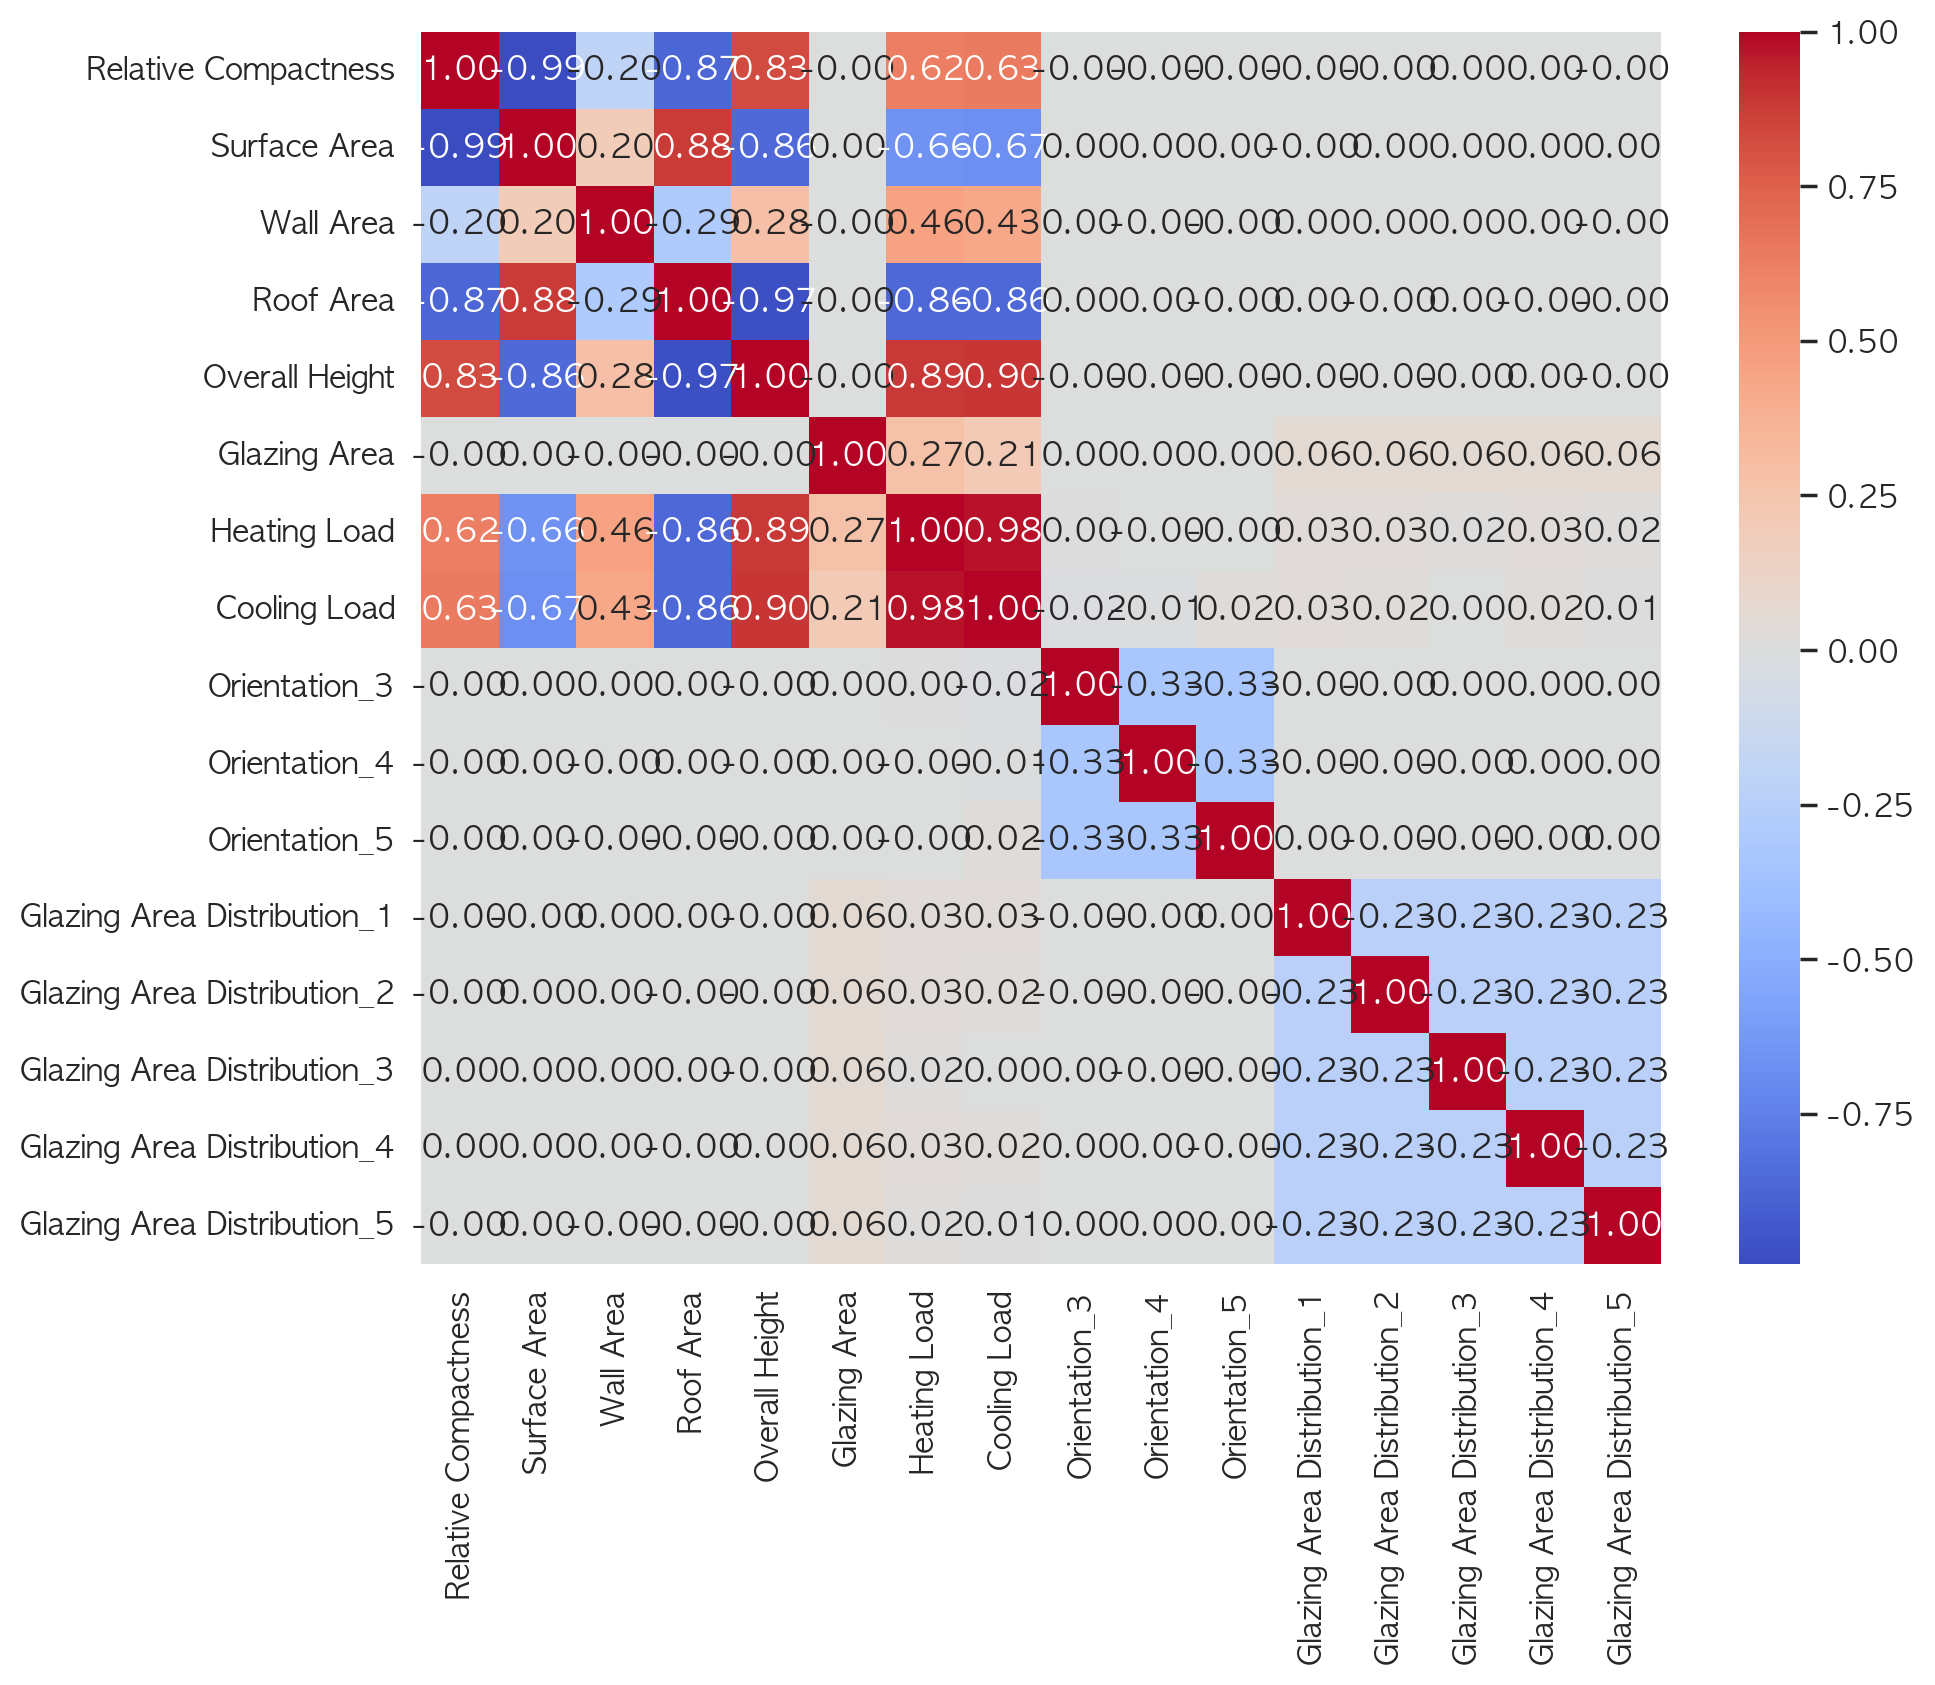

In [223]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [224]:
# PCA
y = df_encoded['Heating Load']

X = df_encoded.drop(columns=['Heating Load', 'Cooling Load'])

Y = y.values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y) # for PLS

In [225]:
pca_full = PCA()

X_pca_full = pca_full.fit_transform(X_scaled)

explained_variance_full = pca_full.explained_variance_ratio_
cumulative_variance_full = np.cumsum(explained_variance_full)

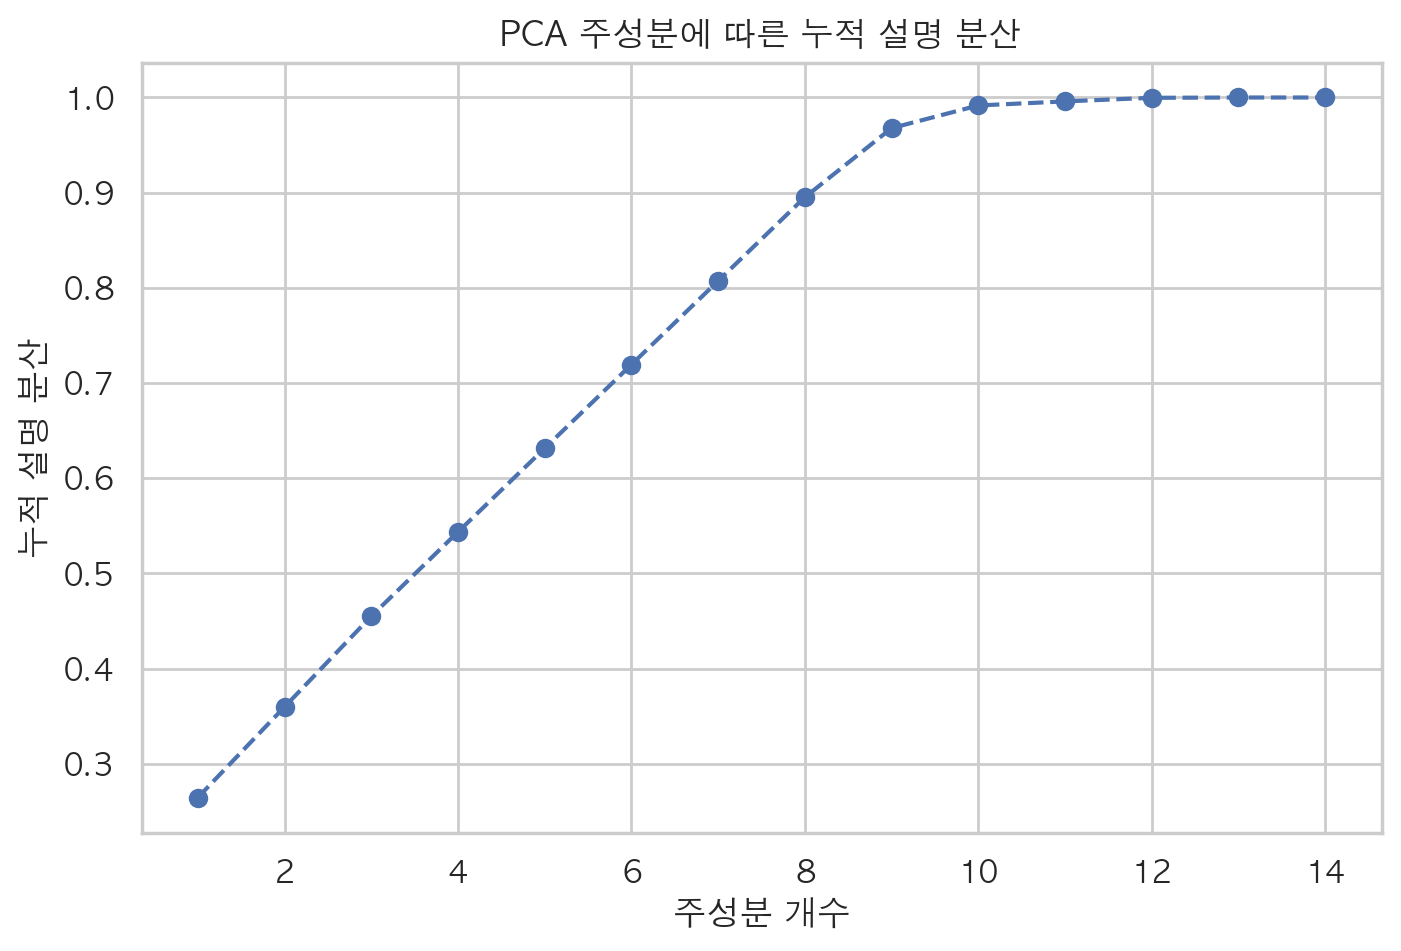

In [226]:
plt.rc('font', family='AppleGothic') # for mac
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance_full)+1), cumulative_variance_full, marker='o', linestyle='--')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산')
plt.title('PCA 주성분에 따른 누적 설명 분산')
plt.grid(True)
plt.show()

In [227]:
# 14개의 주성분 중, 설명력을 95% 이상 유지하는 차원 선택
pca_95 = PCA(n_components=0.95)   # 누적 설명 분산 비율이 95% 이상이 되도록 자동 선택
X_pca = pca_95.fit_transform(X_scaled)

In [228]:
print(f"선택된 주성분 개수: {pca_95.n_components_}")

선택된 주성분 개수: 9


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [230]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [231]:
y_pred_dum = model.predict(X_test)
mse_dum = mean_squared_error(y_test, y_pred_dum)
r2_dum = r2_score(y_test, y_pred_dum)

In [232]:
print(f"Mean Squared Error (MSE): {mse_dum:.2f}")
print(f"R2 Score : {r2_dum:.2f}")

Mean Squared Error (MSE): 13.85
R2 Score : 0.87


In [233]:
# PLS
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [234]:
mse_cv = []
n_components_range = range(1, X_train.shape[1] + 1)

for n in n_components_range:
    pls_temp = PLSRegression(n_components=n)
    # 10-Fold Cross-Validation에서 음의 평균 제곱 오차를 구한다
    scores = cross_val_score(pls_temp, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
    mse_cv.append(-np.mean(scores))
    print(f"n_components = {n}, 교차 검증 MSE = {-np.mean(scores):.4f}")

n_components = 1, 교차 검증 MSE = 0.2305
n_components = 2, 교차 검증 MSE = 0.1147
n_components = 3, 교차 검증 MSE = 0.1087
n_components = 4, 교차 검증 MSE = 0.0857
n_components = 5, 교차 검증 MSE = 0.0806
n_components = 6, 교차 검증 MSE = 0.0797
n_components = 7, 교차 검증 MSE = 0.0798
n_components = 8, 교차 검증 MSE = 0.0795
n_components = 9, 교차 검증 MSE = 0.0796
n_components = 10, 교차 검증 MSE = 0.0795
n_components = 11, 교차 검증 MSE = 0.0787
n_components = 12, 교차 검증 MSE = 0.0787
n_components = 13, 교차 검증 MSE = 0.0787
n_components = 14, 교차 검증 MSE = 360.6978


In [235]:
optimal_n = np.argmin(mse_cv) + 1
print("\n최적의 주성분 개수:", optimal_n)


최적의 주성분 개수: 11


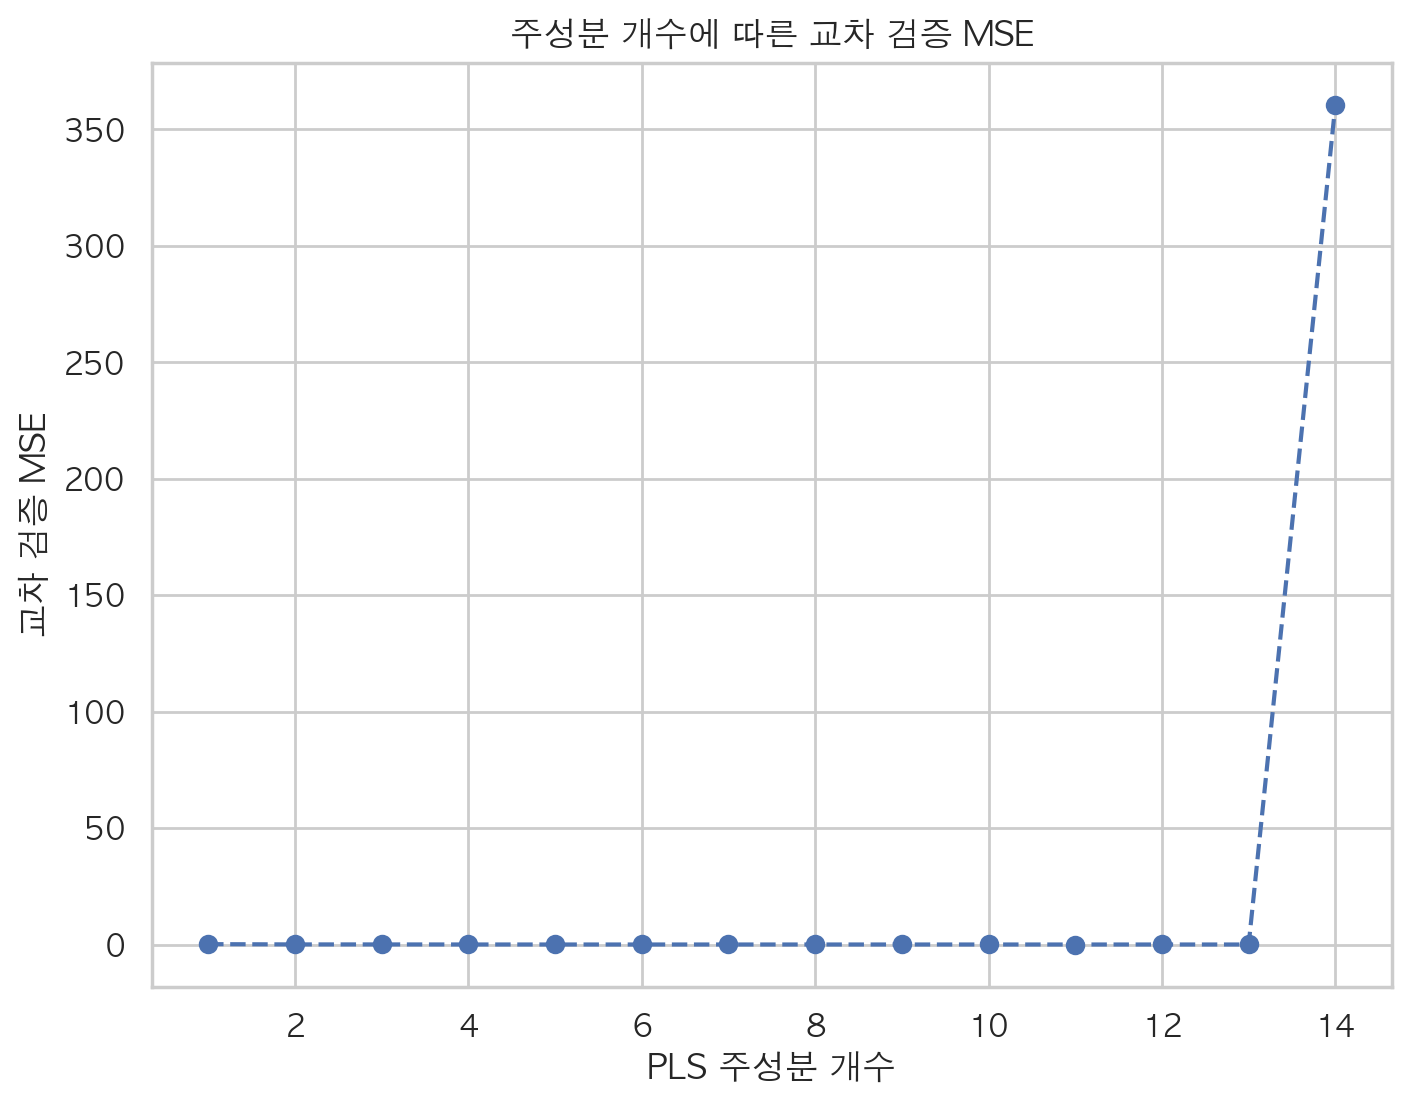

In [236]:
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(8,6))
plt.plot(n_components_range, mse_cv, marker='o', linestyle='--')
plt.xlabel('PLS 주성분 개수')
plt.ylabel('교차 검증 MSE')
plt.title('주성분 개수에 따른 교차 검증 MSE')
plt.grid(True)
plt.show()

In [237]:
pls_opt = PLSRegression(n_components=optimal_n)
pls_opt.fit(X_train, Y_train)

PLSRegression(n_components=np.int64(11))

In [238]:
Y_pred_dum = pls_opt.predict(X_test)
mse_test_dum_pls = mean_squared_error(Y_test, Y_pred_dum)
r2_test_dum_pls = r2_score(Y_test, Y_pred_dum)

In [239]:
print("\nPLS 회귀 모델 성능 (최적 주성분 사용):")
print("테스트 MSE:", mse_test_dum_pls)
print("테스트 R2 Score:", r2_test_dum_pls)


PLS 회귀 모델 성능 (최적 주성분 사용):
테스트 MSE: 0.081122087760631
테스트 R2 Score: 0.9208646773190396


In [240]:
df_comparison_dum = pd.DataFrame({
    '모델': ['PLS', 'PCR'],
    'MSE': [mse_test_dum_pls, mse_dum],
    'R² Score': [r2_test_dum_pls, r2_dum]
})

In [241]:
df_comparison_dum

,모델,MSE,R² Score
0,PLS,0.081122,0.920865
1,PCR,13.848811,0.867135


In [242]:
df_comparison

,모델,MSE,R² Score
0,PLS,0.109459,0.893226
1,PCR,15.465572,0.833088


* PLS와 PCR 모두에서 MSE가 감소하고 R² 점수가 상승함 → 더미 처리가 정보 손실 없이 범주형 변수의 패턴을 더 잘 반영했음을 보여준다..!